Exploring Sarcasm Dynamics: Insights from Reddit Corpus Analysis

Detecting sarcasm in natural language processing (NLP) presents several challenges due to the complex nature of sarcasm and the nuances involved in its interpretation.

**Contextual Understanding**: Sarcasm often relies heavily on context, tone, and delivery. The same sentence can be sarcastic or non-sarcastic depending on the speaker's tone, the context of the conversation, and the background knowledge of the listener.

**Ambiguity and Irony**: Sarcasm can involve irony, where the intended meaning is the opposite of the literal words used.
**Figurative Language**: Sarcasm often uses figurative language, such as hyperbole, understatement, or metaphors, to convey its meaning.

**Subjectivity and Cultural Variations**: Detecting sarcasm can be subjective and may vary across cultures, languages, and contexts. What is considered sarcastic in one culture or community may not be perceived the same way in another.

**Data Imbalance**: Sarcasm detection datasets often suffer from class imbalance, where non-sarcastic examples significantly outnumber sarcastic examples. This imbalance can affect the performance of machine learning models and may lead to biased results.

Using a brand new dataset for testing and evaluation (our reddit climate change dataset) offers several potential contributions and impacts to social media analysis and natural language processing (NLP) research:
1. Novelty and Diversity: we contribute to the diversity of resources available for sarcasm detection research. This helps in assessing model generalization across different data distributions and time periods, which is crucial for real-world deployment.
2. Addressing Temporal Shifts: Given our new dataset covers a different time period compared to existing datasets used in the literature, our evaluation results can shed light on how sarcasm detection models perform across different temporal contexts. This addresses a gap in understanding how linguistic patterns and sarcasm usage evolve over time on platforms like Reddit.
3. Evaluation of Model Robustness: Testing our pre-trained and modified model on a new dataset provides a rigorous evaluation of its robustness and generalization capabilities. It allows us to assess whether the model's performance remains consistent when applied to unseen data from a different time period and annotation process.

In [ ]:
#Load Huggingface dataset
!pip install datasets -q
!pip install emoji
!pip install contractions
from datasets import load_dataset
import nltk
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from os import path
sns.set()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import datetime as dt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import calendar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
import time
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.layers import Conv1D, Flatten,MaxPooling1D
from keras.preprocessing import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import auc
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
dataset = load_dataset("cathw/reddit_climate_comment", trust_remote_code=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.2 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating train split: 0 examples [00:00, ? examples/s]

Extract all the posts, comments, and replies

In [ ]:
# Initialize empty lists to store post titles, comments, and replies
post_titles = []
comments = []
replies = []

# Iterate through each post in the training dataset
for i in range(len(dataset['train'])):
    try:
        post = dataset['train'][i]

        # Extract post title and append to list
        post_titles.append(post['post_title'])

        # Extract comments for the current post
        post_comments = post['comments']

        # Iterate through each comment for the current post
        for comment_id, comment_data in zip(post_comments['CommentID'], post_comments['CommentBody']):
            # Append comment body to list
            comments.append(comment_data)

            # Check if the comment has replies
            if 'replies' in post_comments:
                # Iterate through each reply for the current comment
                for reply_data in post_comments['replies']:
                    # Append reply body to list
                    replies.append(reply_data['ReplyBody'])
    except Exception as e:
        print(f"Error processing post {i}: {e}")
        continue

# Calculate total number of items
total_items = len(post_titles) + len(comments) + len(replies)

print("Total number of post titles:", len(post_titles))
print("Total number of comments:", len(comments))
print("Total number of replies:", len(replies))
print("Total number of items:", total_items)


Error processing post 309: https://i.redd.it/03zkiihbv7ka1.jpg
Error processing post 1628: http://climateanalytics.org/files/coalphaseouteu-regulator.gif
Error processing post 1874: https://image-store.slidesharecdn.com/f09fd9e4-70af-493f-8982-d668ed2f0c35-original.jpeg
Error processing post 3038: cannot identify image file <_io.BytesIO object at 0x7fc823cbe7f0>


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (113246208 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Total number of post titles: 6546
Total number of comments: 32717
Total number of replies: 352287
Total number of items: 391550


Number of total texts

In [ ]:
import pandas as pd

combined_list = post_titles+comments+replies

df_all = pd.DataFrame({'combined_column': combined_list})

# Print or use the concatenated DataFrame as needed
print(len(df_all))
df_all.head()

391550


,combined_column
0,"“The entire world is in trouble, and it’s weir..."
1,New York Approves Human Composting Law
2,High-efficiency water filter removes 99.9% of ...
3,Gen Z climate activist Greta Thunberg’s putdow...
4,Ringing in the new year with kindness! A New Y...


Aggregate all the text

In [ ]:
import pandas as pd
replies_df = pd.DataFrame({'comments': replies})
flattened_series = replies_df.explode('comments')
reply = flattened_series.drop_duplicates()
comments_df = pd.DataFrame({'comments': comments})
flattened_series_comments = comments_df.explode('comments')
comment = flattened_series_comments.drop_duplicates()
post = pd.DataFrame({'comments': post_titles})
df1 = pd.merge(reply, comment, on='comments',how='outer')
df2 = pd.merge(df1, post, on='comments',how='outer')
print(df2)

                                                 comments
0       Climate change is a crime, a crime against hum...
1                      That's a pretty simple process. :)
2       This is truly interesting. Should this technol...
3       It's going to be necessary at water treatment ...
4       Oh that’s easy! But first, they must charge an...
...                                                   ...
113463  California offshore wind promises a new gold r...
113464  Greta Thunberg ends year with one of the great...
113465  Hydrogen made a surprising comeback in 2022 — ...
113466  Energy giant ExxonMobil sues EU to block energ...
113467  The UK produced a record amount of wind power ...

[113468 rows x 1 columns]


Pre-processing Data

In [ ]:
import re
import pandas as pd

# Function to remove URLs from text
def remove_urls(text):
    if isinstance(text, str):
        return re.sub(r'http\S+', '', text)
    else:
        return text

df_all = df2
# Apply preprocessing functions to the 'combined_column' column
df_all['comments'] = df_all['comments'].apply(remove_urls)

print(df_all)


                                                 comments
0       Climate change is a crime, a crime against hum...
1                      That's a pretty simple process. :)
2       This is truly interesting. Should this technol...
3       It's going to be necessary at water treatment ...
4       Oh that’s easy! But first, they must charge an...
...                                                   ...
113463  California offshore wind promises a new gold r...
113464  Greta Thunberg ends year with one of the great...
113465  Hydrogen made a surprising comeback in 2022 — ...
113466  Energy giant ExxonMobil sues EU to block energ...
113467  The UK produced a record amount of wind power ...

[113468 rows x 1 columns]


Label each text with "\s" as 1 or "\s" as 0

In [ ]:
import pandas as pd
df3 = df_all
df3['contains_slash_s'] = df3['comments'].str.contains('/s(?:\s|$)').apply(lambda x: 1 if x else 0)

print(df3)

                                                 comments  contains_slash_s
0       Climate change is a crime, a crime against hum...                 0
1                      That's a pretty simple process. :)                 0
2       This is truly interesting. Should this technol...                 0
3       It's going to be necessary at water treatment ...                 0
4       Oh that’s easy! But first, they must charge an...                 0
...                                                   ...               ...
113463  California offshore wind promises a new gold r...                 0
113464  Greta Thunberg ends year with one of the great...                 0
113465  Hydrogen made a surprising comeback in 2022 — ...                 0
113466  Energy giant ExxonMobil sues EU to block energ...                 0
113467  The UK produced a record amount of wind power ...                 0

[113468 rows x 2 columns]


Show the number of rows with 'contains_slash_s python'

In [ ]:
count_contains_slash_s_python = df3[df3['contains_slash_s'] == 1].shape[0]
print("Number of rows with 'contains_slash_s python' equal to 1:", count_contains_slash_s_python)

count_contains_slash_s_python = df3[df3['contains_slash_s'] == 0].shape[0]
print("Number of rows with 'contains_slash_s python' equal to 1:", count_contains_slash_s_python)

Number of rows with 'contains_slash_s python' equal to 1: 456
Number of rows with 'contains_slash_s python' equal to 1: 113012


Label "\s" as 1 and not

In [ ]:
combined_df = pd.merge(df3[df3['contains_slash_s'] == 0][:456],df3[df3['contains_slash_s'] == 1],on=['comments','contains_slash_s'],how='outer')
combined_df.to_csv('combined_data.csv', index=False)
df = combined_df
df['CommentBody'] = combined_df['comments']

In [ ]:
df['Label'] = combined_df['contains_slash_s']
df

,comments,contains_slash_s,CommentBody,Label
0,"Climate change is a crime, a crime against hum...",0,"Climate change is a crime, a crime against hum...",0
1,That's a pretty simple process. :),0,That's a pretty simple process. :),0
2,This is truly interesting. Should this technol...,0,This is truly interesting. Should this technol...,0
3,It's going to be necessary at water treatment ...,0,It's going to be necessary at water treatment ...,0
4,"Oh that’s easy! But first, they must charge an...",0,"Oh that’s easy! But first, they must charge an...",0
...,...,...,...,...
907,sounds like something we should make more of! /s,1,sounds like something we should make more of! /s,1
908,Why would they do this while nuclear energy is...,1,Why would they do this while nuclear energy is...,1
909,Nope! In fact electric vehicles are ruining t...,1,Nope! In fact electric vehicles are ruining t...,1
910,What a fucking idiot. /s,1,What a fucking idiot. /s,1


Load Labelled New Dataset

In [ ]:
dataset = load_dataset("SarcasmNet/self-annotated_reddit_climate_comment", trust_remote_code=True)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# Initialize an empty list to store comment bodies and IDs
comment_bodies_list = []
comment_ids_list = []
comment_label_list = []

# Initialize a counter to keep track of processed posts
n = 0
indices = list(range(375))
for i in indices:
    try:
        # Get the post corresponding to the current index
        post = dataset['train'][i]
        if 'comments' in post:
            comments = post['comments']
            if 'CommentBody' in comments and 'CommentID' in comments \
                    and comments['CommentBody'] is not None and comments['CommentID'] is not None:
                comment_bodies_list.extend(comments['CommentBody'])
                comment_ids_list.extend(comments['CommentID'])
                comment_label_list.extend(comments['Label'])
        n += 1
    except Exception as e:
        print(f"Error processing post {i}: {e}")
        continue

# Create a DataFrame from the lists of comment bodies and comment IDs
df = pd.DataFrame({'CommentID': comment_ids_list, 'CommentBody': comment_bodies_list,"Label": comment_label_list})

# Print the DataFrame
print(df)

Error processing post 374: Invalid key: 374 is out of bounds for size 374
     CommentID                                        CommentBody  Label
0      j2igqct        I think you mean sex trafficker Andrew Tate      0
1      j2i6zbt  Greta, if you’re listening out there in the co...      1
2      j2kunlt  I think they are referring to this tweet:\n\nh...      0
3      j2i55du  Elon will jack up the likes on one of his twee...      1
4      j2imktz  Elon Musk probably owes her about a billion do...      0
...        ...                                                ...    ...
2006   j2dm8ml  Why is caring about the environment considered...      0
2007   j2easm2  Doesn’t Christianity say that humans are the s...      1
2008   j2dyium  I dont know about "one of the greatest tweets ...      1
2009   j2elv0p  I mean, I like this girl and I agree with the ...      1
2010   j2gp9cr  Why haven't we all been flooded out by the ris...      1

[2011 rows x 3 columns]


In [ ]:
# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Print the counts
print("Label 0 count:", label_counts[0])
print("Label 1 count:", label_counts[1])

Label 0 count: 456
Label 1 count: 456


Cohen's Kappa Score: a statistical measure that assesses the agreement between two raters or observers who categorize items into mutually exclusive categories. It is commonly used in machine learning and inter-rater reliability studies to evaluate the performance of classification models or the consistency of ratings between human annotators.

In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
df2 = df_sarcasm

labels_annotator_1 = df['Label']
labels_annotator_2 = df2['label'][:912]

kappa = cohen_kappa_score(labels_annotator_1, labels_annotator_2)

print(f"Cohen's kappa score: {kappa}")

Cohen's kappa score: 0.021929824561403466


Preprocessing Climate Data

In [ ]:
import emoji
import contractions
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
df.dropna(subset=['CommentBody'], inplace=True)
df['CommentBody'] = df['CommentBody'].astype(str).str.lower()
# Function to convert emojis to text using the emoji package
def convert_emojis_to_text(comment):
    words = comment.split()
    for i, word in enumerate(words):
        if emoji.emoji_count(word) > 0:
            # Replace emoji with its description
            words[i] = emoji.demojize(word).replace(":", "")  # Convert emoji to text
    return ' '.join(words)
df['CommentBody'] = df['CommentBody'].apply(convert_emojis_to_text)

def expand_contractions(comment):
    return contractions.fix(comment,slang=True)
df['CommentBody'] = df['CommentBody'].apply(expand_contractions)
df['CommentBody'] = df['CommentBody'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
stop_words = set(stopwords.words('english'))
df['CommentBody'] = df['CommentBody'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
print(df)

                                              comments  contains_slash_s  \
0    Climate change is a crime, a crime against hum...                 0   
1                   That's a pretty simple process. :)                 0   
2    This is truly interesting. Should this technol...                 0   
3    It's going to be necessary at water treatment ...                 0   
4    Oh that’s easy! But first, they must charge an...                 0   
..                                                 ...               ...   
907   sounds like something we should make more of! /s                 1   
908  Why would they do this while nuclear energy is...                 1   
909  Nope!  In fact electric vehicles are ruining t...                 1   
910                           What a fucking idiot. /s                 1   
911  I can’t wait to get my ECO monthly box of junk...                 1   

                                           CommentBody  Label  
0                  clim

Import SARC Data

In [ ]:
import pandas as pd
file_path = "/content/train-balanced-sarcasm.csv"
df_sarcasm = pd.read_csv(file_path)
df_sarcasm

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
116834,0,"The IOC doesn't do that for other athletes, wh...",ImitationsHabit,hockey,1,1,0,2016-09,2016-09-30 20:44:43,"With all that said, this tournament was garbag..."
116835,0,That's a great experience :3,walloon5,dayz,5,5,0,2016-09,2016-09-14 23:16:58,Got killed on my first character just now. Saw...
116836,0,Well they might but there have been reports of...,Llamacito,CFB,2,-1,-1,2016-12,2016-12-09 03:37:02,I thought they were just promoting from within?
116837,1,"Well, if they were white and would vote GOP, t...",VanillaIcedTea,politics,2,-1,-1,2016-11,2016-11-02 21:26:05,"ACLU: More than 7,000 eligible Arkansans 'stri..."


SARC 1M Data

In [ ]:
import emoji
import contractions
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
df_sarcasm.dropna(subset=['comment'], inplace=True)
df_sarcasm['comment'] = df_sarcasm['comment'].astype(str).str.lower()
# Function to convert emojis to text using the emoji package
def convert_emojis_to_text(comment):
    words = comment.split()
    for i, word in enumerate(words):
        if emoji.emoji_count(word) > 0:
            # Replace emoji with its description
            words[i] = emoji.demojize(word).replace(":", "")  # Convert emoji to text
    return ' '.join(words)
df_sarcasm['comment'] = df_sarcasm['comment'].apply(convert_emojis_to_text)

def expand_contractions(comment):
    return contractions.fix(comment,slang=True)
df_sarcasm['comment'] = df_sarcasm['comment'].apply(expand_contractions)
df_sarcasm['comment'] = df_sarcasm['comment'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
stop_words = set(stopwords.words('english'))
df_sarcasm['comment'] = df_sarcasm['comment'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
print(df_sarcasm)

        label                                            comment  \
0           0                                              nc nh   
1           0   know west teams play west teams east teams right   
2           0  underdogs earlier today since gronks announcem...   
3           0                meme funny none new york nigga ones   
4           0                                could use one tools   
...       ...                                                ...   
116834      0          ioc athletes hockey get special snowflake   
116835      0                                 great experience 3   
116836      0          well might reports talking couple coaches   
116837      1            well white would vote gop would problem   
116838      0                     lost world jurassic park alien   

                   author           subreddit  score  ups  downs     date  \
0               Trumpbart            politics      2   -1     -1  2016-10   
1               Shbshb906    

Data preprocessing SARC

In [ ]:
df_sarcasm_new = df_sarcasm[:50000]

In [ ]:
# Separate the dataframe into two based on the label
df_class_0 = df_sarcasm_new[df_sarcasm_new['label'] == 0]
df_class_1 = df_sarcasm_new[df_sarcasm_new['label'] == 1]

# Find the minimum number of samples between the two classes
min_samples = min(len(df_class_0), len(df_class_1))

# Sample from each class to match the size of the smaller class
df_balanced_sarcasm = pd.concat([df_class_0.sample(n=min_samples, random_state=42),
                         df_class_1.sample(n=min_samples, random_state=42)],
                         ignore_index=True)

# Shuffle the balanced dataframe
df_balanced_sarcasm = df_balanced_sarcasm.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_balanced_sarcasm)

       label                                            comment  \
0          1                               everyone corrupt one   
1          0                                     otter come say   
2          0                                       mean happens   
3          1                          fined 500 bming community   
4          1           yeah fuck evans depleting infield closer   
...      ...                                                ...   
41325      0              think time swallow bitter pill friend   
41326      0    got kind tired packing unpacking town town dial   
41327      1                                           original   
41328      0  experience trailers someone swapped inputs sud...   
41329      0                                      overwatch ass   

                 author            subreddit  score  ups  downs     date  \
0               MrTiddy           The_Donald      2   -1     -1  2016-10   
1        sheikhyerbouti                  aw

BiLSTM Binary Text Classifier with Regularization

Input Preprocessing: The model tokenizes and pads input sequences to a maximum length of 20, ensuring uniformity in data dimensions.
Embedding Layer: Words are embedded into a dense 128-dimensional vector space, facilitating meaningful representation of semantic relationships.
Bidirectional LSTM Layer: Bidirectional LSTM layers with 64 units each process the embedded sequences in both forward and backward directions, capturing temporal dependencies effectively.
Global Max Pooling: Global Max Pooling extracts the most salient features from the LSTM output, condensing the information into a fixed-length vector.
Dense Layers with Dropout: Dense layers with ReLU activation and dropout regularization are employed for further feature extraction and to prevent overfitting.
Output Layer: A single neuron output layer with sigmoid activation produces binary classification probabilities.
Advantages:

Efficient Text Representation: The model effectively captures complex semantic relationships through word embeddings, allowing for meaningful text representation.
Temporal Dependency Modeling: Bidirectional LSTM layers enable the model to capture temporal dependencies in both forward and backward directions, enhancing its ability to understand context in sequential data.
Global Feature Extraction: Global Max Pooling condenses the extracted features from the LSTM layers, focusing on the most informative aspects of the data while reducing computational complexity.
Regularization: Dropout layers mitigate overfitting by randomly dropping a fraction of units during training, promoting better generalization to unseen data.
Interpretability: The use of a sigmoid activation function in the output layer provides clear and interpretable binary classification probabilities, facilitating decision-making in downstream tasks.
Overall, this model architecture combines efficient text representation, effective temporal dependency modeling, and regularization techniques, making it well-suited for tasks involving sequential data analysis, such as sentiment analysis or text classification.


In [ ]:
import json
import os
import tensorflow as tf
import sklearn
import seaborn as sbs
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
df_sarcasm = df_balanced_sarcasm
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_sarcasm['comment'])
sequences = tokenizer.texts_to_sequences(df_sarcasm['comment'])
max_len = 20
train_inputs = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
train_labels = df_sarcasm['label'].values
test_sequences = tokenizer.texts_to_sequences(df['CommentBody'])
X_val = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')
y_val = df['Label'].values
# Split data into train/validation
#X_train, X_val, y_train, y_val = train_test_split(train_inputs, train_labels,
train_inputs[0]
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(1000, 128)(text_input)
net = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.3)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.3)(net)
output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy',
                                        verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
history = model.fit(train_inputs, train_labels,
                    epochs=30, batch_size=256, callbacks=[mc, es],
                    validation_split=0.1, verbose=1)
model = tf.keras.models.load_model('model_best.hdf5')
y_preds = model.predict(X_val, batch_size=256).round().astype(int)
print("Test accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print("Table: \n",classification_report(y_val, y_preds))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 128)           128000    
                                                                 
 bidirectional (Bidirection  (None, 20, 128)           98816     
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


146/146 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.6500
Epoch 2: val_accuracy did not improve from 0.62158
146/146 [==============================] - 9s 64ms/step - loss: 0.6233 - accuracy: 0.6500 - val_loss: 0.6350 - val_accuracy: 0.6141
Epoch 3/30
146/146 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.6669
Epoch 3: val_accuracy improved from 0.62158 to 0.62570, saving model to model_best.hdf5
146/146 [==============================] - 8s 53ms/step - loss: 0.6100 - accuracy: 0.6669 - val_loss: 0.6313 - val_accuracy: 0.6257
Epoch 4/30
146/146 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.6752
Epoch 4: val_accuracy improved from 0.62570 to 0.62618, saving model to model_best.hdf5
146/146 [==============================] - 7s 50ms/step - loss: 0.5982 - accuracy: 0.6752 - val_loss: 0.6342 - val_accuracy: 0.6262
Epoch 5/30
146/146 [==============================] - ETA: 0s - loss: 0.5874 - accuracy: 0.6832
Epoc

**BiLSTM Text Classifier with Max Pooling and Dropout**

This model architecture consists of several layers for processing sequential data, particularly suitable for tasks such as text classification or sentiment analysis. Here's a breakdown and analysis of each component, along with its advantages:

1. **Input Layer (text_input)**:
   - **Shape**: The input layer expects input sequences of a maximum length of 20.

2. **Embedding Layer (embed_text)**:
   - **Dimensionality Reduction**: Each word is embedded into a dense 128-dimensional vector space.
   - **Advantage**: By embedding words into a lower-dimensional space, the model can capture semantic relationships and reduce computational complexity.

3. **Bidirectional LSTM Layer**:
   - **Temporal Dependency Modeling**: Bidirectional LSTM (Long Short-Term Memory) layers with 64 units each process the embedded sequences in both forward and backward directions, effectively capturing temporal dependencies.
   - **Advantage**: Bidirectional LSTMs are particularly effective in understanding context in sequential data by considering both past and future information.

4. **Global Max Pooling1D Layer**:
   - **Feature Extraction**: Extracts the most salient features from the LSTM output across the time dimension.
   - **Advantage**: Global Max Pooling condenses the extracted features into a fixed-length vector, preserving essential information while reducing dimensionality.

5. **Dense Layers with Dropout**:
   - **Feature Transformation**: Dense layers with ReLU activation further transform the features extracted by the LSTM layers.
   - **Regularization**: Dropout layers with a dropout rate of 0.3 help prevent overfitting by randomly dropping a fraction of units during training.
   - **Advantage**: Dropout regularization enhances model generalization by reducing the reliance on specific units, improving performance on unseen data.

6. **Output Layer**:
   - **Binary Classification**: The output layer consists of a single neuron with sigmoid activation, producing binary classification probabilities.
   - **Advantage**: The sigmoid activation function provides clear and interpretable probability outputs, facilitating decision-making in binary classification tasks.

**Advantages of the Model**:

- **Efficient Text Representation**: By embedding words into a dense vector space, the model efficiently represents textual data, capturing semantic relationships effectively.
- **Temporal Dependency Modeling**: Bidirectional LSTM layers enable the model to understand context and temporal dependencies in sequential data, enhancing its ability to make accurate predictions.
- **Regularization**: Dropout layers mitigate overfitting, improving the model's generalization capabilities and robustness to unseen data.
- **Interpretability**: The sigmoid activation function in the output layer provides interpretable probability scores, aiding in decision-making.

Overall, this model architecture combines effective text representation, temporal dependency modeling, and regularization techniques, making it well-suited for sequential data analysis tasks.


In [ ]:
import json
import os
import tensorflow as tf
import sklearn
import seaborn as sbs
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
df_sarcasm = df_sarcasm_new.sample(n=30000, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_sarcasm['comment'])
sequences = tokenizer.texts_to_sequences(df_sarcasm['comment'])
max_len = 20
train_inputs = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
train_labels = df_sarcasm['label'].values
test_sequences = tokenizer.texts_to_sequences(df['CommentBody'])
X_val = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')
y_val = df['Label'].values
# Split data into train/validation
#X_train, X_val, y_train, y_val = train_test_split(train_inputs, train_labels,
train_inputs[0]
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(1000, 128)(text_input)
net = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.3)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.3)(net)
output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy',
                                        verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
history = model.fit(train_inputs, train_labels,
                    epochs=30, batch_size=256, callbacks=[mc, es],
                    validation_split=0.1, verbose=1)
model = tf.keras.models.load_model('model_best.hdf5')
y_preds = model.predict(X_val, batch_size=256).round().astype(int)
print("Test accuracy score", sklearn.metrics.accuracy_score(y_val, y_preds))
print("Table: \n",classification_report(y_val, y_preds))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 20, 128)           128000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 20, 128)           98816     
 onal)                                                           
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.6559
Epoch 2: val_accuracy improved from 0.62467 to 0.62900, saving model to model_best.hdf5
106/106 [==============================] - 5s 44ms/step - loss: 0.2177 - accuracy: 0.6559 - val_loss: 0.2266 - val_accuracy: 0.6290
Epoch 3/30
106/106 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.6719
Epoch 3: val_accuracy improved from 0.62900 to 0.63633, saving model to model_best.hdf5
106/106 [==============================] - 3s 33ms/step - loss: 0.2101 - accuracy: 0.6719 - val_loss: 0.2288 - val_accuracy: 0.6363
Epoch 4/30
106/106 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.6822
Epoch 4: val_accuracy did not improve from 0.63633
106/106 [==============================] - 2s 16ms/step - loss: 0.2058 - accuracy: 0.6822 - val_loss: 0.2269 - val_accuracy: 0.6267
Epoch 5/30
106/106 [==============================] - ETA: 0s - loss: 0.2002 - accuracy: 0.6933
Epoc

Original final1 (without adjust)


In [ ]:

import seaborn as sbs
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_sarcasm['comment'])
sequences = tokenizer.texts_to_sequences(df_sarcasm['comment'])
max_len = 20
y_val = df['Label'].values
y_train = df_sarcasm['label'].values
sequences_train = tokenizer.texts_to_sequences(df_sarcasm['comment'])
sequences_val = tokenizer.texts_to_sequences(df['CommentBody'])
train_inputs = pad_sequences(sequences_train, maxlen=max_len, padding='post', truncating='post')
val_inputs = pad_sequences(sequences_val, maxlen=max_len, padding='post', truncating='post')
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
train_inputs[0]
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(1000, 128)(text_input)
#embed_text = Embedding(input_dim=len(tokenizer.word_index) + 1,
                       #output_dim=embedding_dim,
                       #weights=[embedding_matrix],
                       #trainable=True)(text_input)
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(embed_text)
pool1 = MaxPooling1D(pool_size=2)(conv1)
gru1 = Bidirectional(GRU(64, return_sequences=True))(pool1)
flat1 = Flatten()(gru1)
conv2 = Conv1D(filters=128, kernel_size=4, activation='relu')(embed_text)
pool2 = MaxPooling1D(pool_size=2)(conv2)
gru2 = Bidirectional(GRU(64, return_sequences=True))(pool2)
flat2 = Flatten()(gru2)
conv3 = Conv1D(filters=128, kernel_size=5, activation='relu')(embed_text)
pool3 = MaxPooling1D(pool_size=2)(conv3)
gru3 = Bidirectional(GRU(64, return_sequences=True))(pool3)
flat3 = Flatten()(gru3)
concatenated = Concatenate()([flat1, flat2, flat3])
dense = Dense(64, activation='relu')(concatenated)
drop = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(drop)
model = Model(text_input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
es = EarlyStopping(monitor="val_accuracy", mode="max", patience=5, verbose=1)
history = model.fit(
    train_inputs, y_train,
    epochs=30,
    batch_size=128,
    class_weight=class_weight_dict,
    callbacks=[mc, es],
    validation_data=(val_inputs, y_val),
    verbose=1
)
best_model = tf.keras.models.load_model('best_model.hdf5')
y_preds = best_model.predict(val_inputs, batch_size=128).round().astype(int)
print("Validation accuracy score:", accuracy_score(y_val, y_preds))
print("Classification report:\n", classification_report(y_val, y_preds))

Epoch 1/30
235/235 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.6057
Epoch 1: val_accuracy improved from -inf to 0.64364, saving model to best_model.hdf5
235/235 [==============================] - 25s 62ms/step - loss: 0.6572 - accuracy: 0.6057 - val_loss: 0.6351 - val_accuracy: 0.6436
Epoch 2/30
  2/235 [..............................] - ETA: 22s - loss: 0.5914 - accuracy: 0.6914

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.6638
Epoch 2: val_accuracy improved from 0.64364 to 0.64693, saving model to best_model.hdf5
235/235 [==============================] - 5s 23ms/step - loss: 0.6127 - accuracy: 0.6638 - val_loss: 0.6404 - val_accuracy: 0.6469
Epoch 3/30
235/235 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.6922
Epoch 3: val_accuracy did not improve from 0.64693
235/235 [==============================] - 4s 17ms/step - loss: 0.5778 - accuracy: 0.6922 - val_loss: 0.6853 - val_accuracy: 0.6371
Epoch 4/30
235/235 [==============================] - ETA: 0s - loss: 0.5212 - accuracy: 0.7319
Epoch 4: val_accuracy did not improve from 0.64693
235/235 [==============================] - 4s 16ms/step - loss: 0.5212 - accuracy: 0.7319 - val_loss: 0.7834 - val_accuracy: 0.6393
Epoch 5/30
235/235 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.7750
Epoch 5: val_accuracy did not improve fro

Original final2 (without adjust)

In [ ]:
import seaborn as sbs
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_balanced_sarcasm['comment'])
sequences = tokenizer.texts_to_sequences(df_balanced_sarcasm['comment'])
max_len = 20
y_val = df['Label'].values
y_train = df_balanced_sarcasm['label'].values
sequences_train = tokenizer.texts_to_sequences(df_balanced_sarcasm['comment'])
sequences_val = tokenizer.texts_to_sequences(df['CommentBody'])
train_inputs = pad_sequences(sequences_train, maxlen=max_len, padding='post', truncating='post')
val_inputs = pad_sequences(sequences_val, maxlen=max_len, padding='post', truncating='post')
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
train_inputs[0]
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(1000, 128)(text_input)
#embed_text = Embedding(input_dim=len(tokenizer.word_index) + 1,
                       #output_dim=embedding_dim,
                       #weights=[embedding_matrix],
                       #trainable=True)(text_input)
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(embed_text)
pool1 = MaxPooling1D(pool_size=2)(conv1)
gru1 = Bidirectional(GRU(64, return_sequences=True))(pool1)
flat1 = Flatten()(gru1)
conv2 = Conv1D(filters=128, kernel_size=4, activation='relu')(embed_text)
pool2 = MaxPooling1D(pool_size=2)(conv2)
gru2 = Bidirectional(GRU(64, return_sequences=True))(pool2)
flat2 = Flatten()(gru2)
conv3 = Conv1D(filters=128, kernel_size=5, activation='relu')(embed_text)
pool3 = MaxPooling1D(pool_size=2)(conv3)
gru3 = Bidirectional(GRU(64, return_sequences=True))(pool3)
flat3 = Flatten()(gru3)
concatenated = Concatenate()([flat1, flat2, flat3])
dense = Dense(64, activation='relu')(concatenated)
drop = Dropout(0.3)(dense)
output = Dense(1, activation='sigmoid')(drop)
model = Model(text_input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
es = EarlyStopping(monitor="val_accuracy", mode="max", patience=5, verbose=1)
history = model.fit(
    train_inputs, y_train,
    epochs=30,
    batch_size=128,
    class_weight=class_weight_dict,
    callbacks=[mc, es],
    validation_data=(val_inputs, y_val),
    verbose=1
)
best_model = tf.keras.models.load_model('best_model.hdf5')
y_preds = best_model.predict(val_inputs, batch_size=128).round().astype(int)
print("Validation accuracy score:", accuracy_score(y_val, y_preds))
print("Classification report:\n", classification_report(y_val, y_preds))

Epoch 1/30
323/323 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.6090
Epoch 1: val_accuracy improved from -inf to 0.66557, saving model to best_model.hdf5
323/323 [==============================] - 42s 105ms/step - loss: 0.6493 - accuracy: 0.6090 - val_loss: 0.6162 - val_accuracy: 0.6656
Epoch 2/30
  1/323 [..............................] - ETA: 25s - loss: 0.6056 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


323/323 [==============================] - ETA: 0s - loss: 0.6113 - accuracy: 0.6572
Epoch 2: val_accuracy improved from 0.66557 to 0.67325, saving model to best_model.hdf5
323/323 [==============================] - 25s 76ms/step - loss: 0.6113 - accuracy: 0.6572 - val_loss: 0.6194 - val_accuracy: 0.6732
Epoch 3/30
323/323 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.6857
Epoch 3: val_accuracy did not improve from 0.67325
323/323 [==============================] - 24s 73ms/step - loss: 0.5796 - accuracy: 0.6857 - val_loss: 0.6504 - val_accuracy: 0.6382
Epoch 4/30
323/323 [==============================] - ETA: 0s - loss: 0.5342 - accuracy: 0.7152
Epoch 4: val_accuracy did not improve from 0.67325
323/323 [==============================] - 23s 73ms/step - loss: 0.5342 - accuracy: 0.7152 - val_loss: 0.7171 - val_accuracy: 0.6228
Epoch 5/30
323/323 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.7576
Epoch 5: val_accuracy did not improve 

The Multi-path Convolutional Neural Network with Gated Recurrent Units (GRUs):

---

The Multi-path Convolutional Neural Network with Gated Recurrent Units (GRUs) presents a comprehensive approach to handling sequential data, particularly adept in tasks involving text or time series analysis. This model amalgamates the robust characteristics of both Convolutional Neural Networks (CNNs) and GRUs, showcasing a sophisticated architecture tailored for intricate data processing.

At its inception, the input layer efficiently accommodates sequences of fixed lengths, a pivotal requirement for sequential data processing tasks. The subsequent embedding layer transcends each word into a dense 128-dimensional vector space, effectively capturing nuanced semantic relationships within the text corpus.

Moving deeper, the Conv1D layers, featuring 128 distinct filters with kernel sizes ranging from 3 to 7, exhibit remarkable versatility in capturing diverse features at varying scales. Accompanied by MaxPooling1D layers, which strategically distill salient information, the network adeptly reduces dimensionality while preserving essential contextual cues.

The integration of Bidirectional GRU layers, comprising 64 units each, signifies a crucial enhancement in capturing temporal dependencies bidirectionally. By processing sequences both forwards and backwards, the model attains a holistic understanding of context, crucial for accurate predictions.

Following a process of dimensionality reduction via Flatten layers, the Concatenate layer seamlessly merges outputs from parallel paths, facilitating comprehensive feature utilization for subsequent classification or regression tasks. The subsequent Dense layer, with 64 neurons, further refines feature representations, preparing them for the final prediction stage.

Mitigating the risk of overfitting, the Dropout layer, with a dropout rate of 0.3, serves a pivotal role in enhancing model generalization by randomly deactivating a portion of units during training. Finally, the Output layer, comprising a single neuron and employing the sigmoid activation function, yields probability-based outputs, apt for binary
classification tasks.

In essence, the Multi-path Convolutional Neural Network with GRUs embodies a sophisticated fusion of architectural elements, adeptly tailored for processing sequential data. Its intricate design, marked by meticulous attention to detail, underscores its efficacy in diverse applications, warranting its consideration in a multitude of analytical endeavors.


Multi-kernel ConvGRU Model (best)

In [ ]:
import seaborn as sbs
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_balanced_sarcasm['comment'])
sequences = tokenizer.texts_to_sequences(df_balanced_sarcasm['comment'])
max_len = 20
y_val = df['Label'].values
y_train = df_balanced_sarcasm['label'].values
sequences_train = tokenizer.texts_to_sequences(df_balanced_sarcasm['comment'])
sequences_val = tokenizer.texts_to_sequences(df['CommentBody'])
train_inputs = pad_sequences(sequences_train, maxlen=max_len, padding='post', truncating='post')
val_inputs = pad_sequences(sequences_val, maxlen=max_len, padding='post', truncating='post')
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
train_inputs[0]
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(1000, 128)(text_input)
#embed_text = Embedding(input_dim=len(tokenizer.word_index) + 1,
                       #output_dim=embedding_dim,
                       #weights=[embedding_matrix],
                       #trainable=True)(text_input)
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(embed_text)
pool1 = MaxPooling1D(pool_size=2)(conv1)
gru1 = Bidirectional(GRU(64, return_sequences=True))(pool1)
flat1 = Flatten()(gru1)
conv2 = Conv1D(filters=128, kernel_size=5, activation='relu')(embed_text)
pool2 = MaxPooling1D(pool_size=2)(conv2)
gru2 = Bidirectional(GRU(64, return_sequences=True))(pool2)
flat2 = Flatten()(gru2)
conv3 = Conv1D(filters=128, kernel_size=7, activation='relu')(embed_text)
pool3 = MaxPooling1D(pool_size=2)(conv3)
gru3 = Bidirectional(GRU(64, return_sequences=True))(pool3)
flat3 = Flatten()(gru3)
concatenated = Concatenate()([flat1, flat2, flat3])
dense = Dense(64, activation='relu')(concatenated)
drop = Dropout(0.3)(dense)
output = Dense(1, activation='sigmoid')(drop)
model = Model(text_input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
es = EarlyStopping(monitor="val_accuracy", mode="max", patience=5, verbose=1)
history = model.fit(
    train_inputs, y_train,
    epochs=30,
    batch_size=128,
    class_weight=class_weight_dict,
    callbacks=[mc, es],
    validation_data=(val_inputs, y_val),
    verbose=1
)
best_model = tf.keras.models.load_model('best_model.hdf5')
y_preds = best_model.predict(val_inputs, batch_size=128).round().astype(int)
print("Validation accuracy score:", accuracy_score(y_val, y_preds))
print("Classification report:\n", classification_report(y_val, y_preds))

Epoch 1/30
323/323 [==============================] - ETA: 0s - loss: 0.6515 - accuracy: 0.6068
Epoch 1: val_accuracy improved from -inf to 0.69079, saving model to best_model.hdf5
323/323 [==============================] - 42s 102ms/step - loss: 0.6515 - accuracy: 0.6068 - val_loss: 0.6087 - val_accuracy: 0.6908
Epoch 2/30
  1/323 [..............................] - ETA: 22s - loss: 0.6400 - accuracy: 0.6328

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


323/323 [==============================] - ETA: 0s - loss: 0.6104 - accuracy: 0.6590
Epoch 2: val_accuracy did not improve from 0.69079
323/323 [==============================] - 24s 76ms/step - loss: 0.6104 - accuracy: 0.6590 - val_loss: 0.6557 - val_accuracy: 0.6458
Epoch 3/30
323/323 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.6812
Epoch 3: val_accuracy did not improve from 0.69079
323/323 [==============================] - 23s 72ms/step - loss: 0.5792 - accuracy: 0.6812 - val_loss: 0.6607 - val_accuracy: 0.6382
Epoch 4/30
323/323 [==============================] - ETA: 0s - loss: 0.5276 - accuracy: 0.7231
Epoch 4: val_accuracy did not improve from 0.69079
323/323 [==============================] - 23s 70ms/step - loss: 0.5276 - accuracy: 0.7231 - val_loss: 0.8026 - val_accuracy: 0.5976
Epoch 5/30
323/323 [==============================] - ETA: 0s - loss: 0.4565 - accuracy: 0.7634
Epoch 5: val_accuracy did not improve from 0.69079
323/323 [===============

Multi-scale Contextual Capture: Using convolutions with different sizes to better understand the input data's details.
Temporal Dependency Learning: A bidirectional GRU layer captures patterns from before and after the current point in time.Feature Integration: Combining outputs from several convolutions with dense layers for more accurate predictions.
Dynamic Temporal Characteristics: Bidirectional GRUs help the model learn from past events and predict future ones, improving its grasp of how sequences change over time.


Bidirectional LSTM Text Classifier 2.0


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import class_weight

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_sarcasm['comment'])
sequences = tokenizer.texts_to_sequences(df_sarcasm['comment'])
max_len = 20
train_inputs = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
train_labels = df_sarcasm['label'].values

# Preprocess balanced dataset
test_sequences = tokenizer.texts_to_sequences(df['CommentBody'])
X_val = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')
y_val = df['Label'].values

# Define class weights (if dealing with class imbalance)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

# Define model architecture
max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(text_input)
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(embed_text)
pooling_layer = tf.keras.layers.GlobalMaxPooling1D()(lstm_layer)
dense_layer_1 = tf.keras.layers.Dense(64, activation='relu')(pooling_layer)
dropout_layer_1 = tf.keras.layers.Dropout(0.3)(dense_layer_1)
dense_layer_2 = tf.keras.layers.Dense(32, activation='relu')(dropout_layer_1)
dropout_layer_2 = tf.keras.layers.Dropout(0.3)(dense_layer_2)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_layer_2)

# Compile the model
model = tf.keras.models.Model(inputs=text_input, outputs=output_layer)
optimizer = RMSprop()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])

# Define callbacks
mc = ModelCheckpoint('model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

# Train the model
history = model.fit(train_inputs, train_labels, epochs=30, batch_size=256,
                    validation_split=0.1, verbose=1, callbacks=[mc, es], class_weight=class_weights_dict)

# Load the best model
model = tf.keras.models.load_model('model_best.hdf5')

# Evaluate the model on the test set
y_preds = model.predict(X_val, batch_size=256).round().astype(int)
print("Test accuracy score:", accuracy_score(y_val, y_preds))
print("Classification Report:\n", classification_report(y_val, y_preds))


Epoch 1/30
146/146 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5254
Epoch 1: val_accuracy improved from -inf to 0.55843, saving model to model_best.hdf5
146/146 [==============================] - 15s 83ms/step - loss: 0.6916 - accuracy: 0.5254 - val_loss: 0.6846 - val_accuracy: 0.5584
Epoch 2/30
  1/146 [..............................] - ETA: 13s - loss: 0.6858 - accuracy: 0.5391

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


146/146 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.6149
Epoch 2: val_accuracy improved from 0.55843 to 0.63102, saving model to model_best.hdf5
146/146 [==============================] - 8s 57ms/step - loss: 0.6540 - accuracy: 0.6149 - val_loss: 0.6311 - val_accuracy: 0.6310
Epoch 3/30
146/146 [==============================] - ETA: 0s - loss: 0.5997 - accuracy: 0.6836
Epoch 3: val_accuracy improved from 0.63102 to 0.63949, saving model to model_best.hdf5
146/146 [==============================] - 8s 54ms/step - loss: 0.5997 - accuracy: 0.6836 - val_loss: 0.6250 - val_accuracy: 0.6395
Epoch 4/30
146/146 [==============================] - ETA: 0s - loss: 0.5493 - accuracy: 0.7370
Epoch 4: val_accuracy improved from 0.63949 to 0.64045, saving model to model_best.hdf5
146/146 [==============================] - 7s 48ms/step - loss: 0.5493 - accuracy: 0.7370 - val_loss: 0.6552 - val_accuracy: 0.6405
Epoch 5/30
146/146 [==============================] - ETA: 0s -

Logistic Regression

baseline

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_sarcasm and df_balanced are already defined
train_df = df_sarcasm_new.sample(n=10000, random_state=42)
X_train = train_df['comment']
y_train = train_df['label']
X_test = df_balanced['CommentBody']
y_test = df_balanced['Label']
# Split data into training and testing sets
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

EDA

In [ ]:
!pip install pandas wordcloud matplotlib contractions nltk emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.0 MB/s eta 0:00:00


In [ ]:
#bigram word cloud
import pandas as pd
import emoji
import contractions
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams
from collections import Counter

# Make sure to install these libraries using pip if you haven't already:
# !pip install pandas emoji contractions

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('combined_data.csv', sep=',')

# Combine all comments into one text
# Corrected line: 'CommentBody' is replaced with 'comments'
comments_text = " ".join(comment for comment in df.comments.dropna())

# Function to convert emojis to text
def convert_emojis_to_text(text):
    return emoji.demojize(text, delimiters=(" ", " "))

# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text, slang=True)

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words])

# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# Apply preprocessing steps to comments_text
comments_text = comments_text.lower()
comments_text = convert_emojis_to_text(comments_text)
comments_text = expand_contractions(comments_text)
comments_text = remove_punctuation(comments_text)
comments_text = remove_stopwords(comments_text)
comments_text = lemmatize_text(comments_text)

# Tokenize the combined text
tokens = word_tokenize(comments_text)

# Generate bigrams
bigram_tokens = list(bigrams(tokens))

# Create a Counter object to count bigram frequencies
bigram_freq = Counter(bigram_tokens)

# The most_common method returns all elements if not provided a number
most_common_bigrams = bigram_freq.most_common()

# Print the most common bigrams and their frequencies
#for bigram, freq in most_common_bigrams:
    #print(f'{bigram}: {freq}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd

# Assuming most_common_bigrams contains the bigrams and their frequencies

# Convert the list of bigrams to a pandas DataFrame
bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

# Ensure frequency is an integer
bigrams_df['Frequency'] = bigrams_df['Frequency'].astype(int)

# Convert bigram tuples into a string representation
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: '_'.join(x))

# Reorder DataFrame columns so 'Frequency' is first
bigrams_df = bigrams_df[['Frequency', 'Bigram']]

# Export the DataFrame to a CSV file
bigrams_df.to_csv('bigrams_frequency.csv', index=False, header=False)

print("Bigrams and frequencies have been exported to bigrams_frequency.csv")

Bigrams and frequencies have been exported to bigrams_frequency.csv


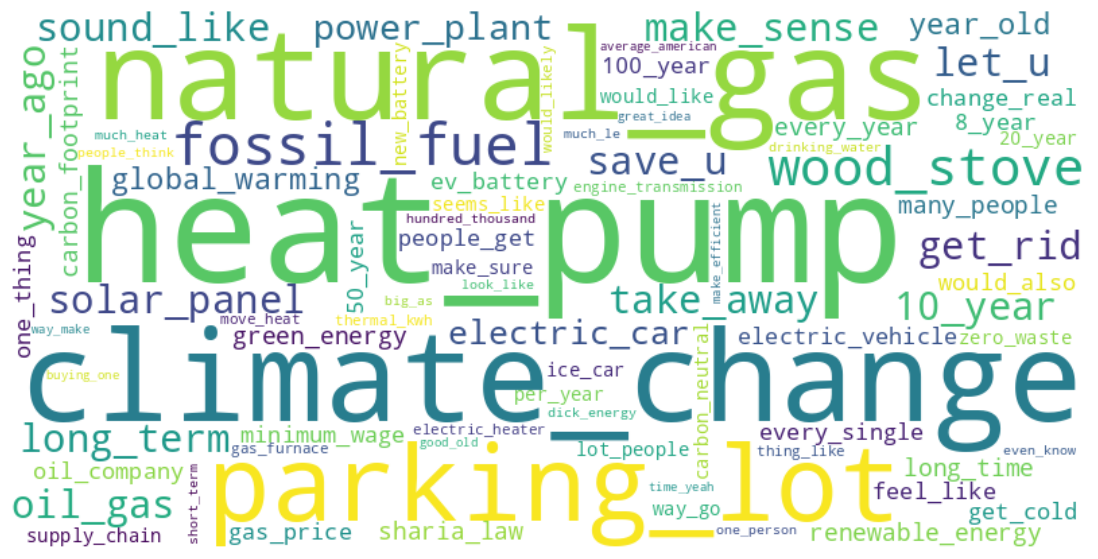

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top 20 most common bigrams
top_20_bigrams = bigram_freq.most_common(80)

# Convert the top 20 bigram tuples into a string with underscores joining the words in each bigram
bigram_string = ' '.join(['_'.join(bigram) for bigram, freq in top_20_bigrams])

# Generate the word cloud for the top 20 bigrams
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
!pip install pandas vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # Convert to string in case the text is not already a string
    text = str(text)
    # Use the analyzer to get the sentiment scores
    sentiment_score = analyzer.polarity_scores(text)
    # Return the sentiment score dictionary
    return sentiment_score

# Ensure that the 'comments' column is of string type
df['comments'] = df['comments'].astype(str)

# Apply the function to each comment to get the sentiment score
# and store the results in a new column called 'sentiment'
df['sentiment'] = df['comments'].apply(get_sentiment)

# Now, let's look at the sentiment scores by inspecting the first few entries
print(df['sentiment'].head())

0    {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...
2    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.125, 'neu': 0.816, 'pos': 0.059, 'co...
Name: sentiment, dtype: object


Sentiment Analysis

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming 'df' is your DataFrame and the 'comments' column contains the text to be analyzed
# Assuming you have already run the sentiment analysis and have a 'sentiment' column with scores

# Define a function to classify the sentiment based on the compound score
def classify_sentiment(sentiment_dict):
    compound_score = sentiment_dict['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the sentiment scores
df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Count the occurrences of each sentiment class
sentiment_counts = df['sentiment_class'].value_counts()

# Print the counts
print(sentiment_counts)

positive    426
negative    281
neutral     205
Name: sentiment_class, dtype: int64


**Reference**

Khodak, M., Saunshi, N., & Vodrahalli, K. (2018). A Large Self-Annotated Corpus for Sarcasm. In LREC 2018 (pp. 1-6).

Rahman M O, Hossain M S, Junaid T S, et al. Predicting prices of stock market using gated recurrent units (GRUs) neural networks[J]. Int. J. Comput. Sci. Netw. Secur, 2019, 19(1): 213-222.

Yu Y, Si X, Hu C, et al. A review of recurrent neural networks: LSTM cells and network architectures[J]. Neural computation, 2019, 31(7): 1235-1270.
Gole, M., Nwadiugwu, W. P., & Miranskyy, A. (2023). On Sarcasm Detection with OpenAI GPT-based Models.

B. Sonare, J. H. Dewan, S. D. Thepade, V. Dadape, T. Gadge and A. Gavali, "Detecting Sarcasm in Reddit Comments: A Comparative Analysis," 2023 4th International Conference for Emerging Technology (INCET), Belgaum, India, 2023, pp. 1-6, doi: 10.1109/INCET57972.2023.10170613.


Appedix

Randomly Shuffle

In [ ]:
from aiohttp.client_exceptions import ClientResponseError
from PIL import UnidentifiedImageError
import random

# Shuffle the indices of the posts in the 'train' set
indices = list(range(len(dataset['train'])))
random.shuffle(indices)

# Initialize an empty list to store comment bodies
comment_bodies_list = []

# Initialize a counter to keep track of processed posts
n = 0

# Iterate through the shuffled indices and access the posts accordingly
for i in indices:
    try:
        # Get the post corresponding to the current index
        post = dataset['train'][i]

        # Check if the post has comments
        if 'comments' in post:
            comments = post['comments']
            # Check if the comment body exists and is not None
            if 'CommentBody' in comments and comments['CommentBody'] is not None:
                # Extend the comment_bodies_list with the individual strings in the CommentBody list
                comment_bodies_list.extend(comments['CommentBody'])
        # Increment the counter
        n += 1
        # Stop processing when 2500 posts have been processed
        if n > 2000:
            break
    except (UnidentifiedImageError, ClientResponseError) as e:
        print(f"Error processing post {i}: {e}")
        continue

# Print or use comment bodies list as needed
print(comment_bodies_list)

["Sure it's a good step and I think it will have an effect, but the majority of my household waste isn't straws, can rings or whatever else; it's soft plastic that comes wrapped around Strawberries, mushrooms, frozen foods, fridge foods, and not to mention all of the soft plastic that the pallets come wrapped in during transportation.", 'That will really help.', 'They banned 6 items that make up 5%of their overall plastic waste.', 'Legislation that encourages plant based diets is gonna help a lot more than any oil or gas initiative.', 'Passing a law making plastic biodegradable would do a lot more .', 'I was pretty certain Canada was sequestering the majority of its plastic waste underground. The plastics we used to sell overseas as “recycling” might end up in rivers and oceans since it’s out of our control. \n\nIf we want to stop plastics from getting into the ocean, shouldn’t we be more judicious about our disposal instead of restrictive of our use?', 'Are condoms illegal now?', 'Rec

Extract Comment ID and Comment Body

In [ ]:
import pandas as pd

# Initialize an empty list to store comment bodies and IDs
comment_bodies_list = []
comment_ids_list = []

# Initialize a counter to keep track of processed posts
n = 0

# Iterate through the shuffled indices and access the posts accordingly
for i in indices:
    try:
        # Get the post corresponding to the current index
        post = dataset['train'][i]
        comment_bodies_list.append(post['post_title'])
        if 'comments' in post:
            comments = post['comments']
            if 'CommentBody' in comments and comments['CommentBody'] is not None:
                comment_bodies_list.extend(comments['CommentBody'])
                comment_ids_list.extend(comments['CommentID'])
        # Increment the counter
        n += 1
        print(n)
    except Exception as e:
        print(f"Error processing post {i}: {e}")
        continue

# Create a DataFrame from the lists of comment bodies and comment IDs
df = pd.DataFrame({'CommentBody': comment_bodies_list})
print(df)

import pandas as pd
df = pd.DataFrame(list(comment_dict.items()), columns=['CommentBody'])
# Print the DataFrame
print(df)